In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np

In [2]:
import json

with open('/kaggle/input/mental-health-data/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [3]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [4]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

## Exploratory Data Analysis

### Distribution of Intents

In [5]:
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

### Pattern and Response analysis

In [6]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

## Data Preprocessing

In [7]:
import re
# Preprocessing function
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_count,response_count
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2,5
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3,5
2,greeting,is anyone there,[Hello there. Tell me how are you feeling toda...,16,5
3,greeting,hi there,[Hello there. Tell me how are you feeling toda...,8,5
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5,5
...,...,...,...,...,...
227,fact,how do i know if i'm unwell,"[If your beliefs , thoughts , feelings or beha...",28,1
228,fact,how can i maintain social connections what if ...,"[A lot of people are alone right now, but we d...",61,1
229,fact,what's the difference between anxiety and stress,[Stress and anxiety are often used interchange...,49,1
230,fact,what's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",53,1


In [8]:
len(df['tag'].unique())

50

In [9]:
X = df['patterns']
y = df['tag']

## Build and Train model

#### Model: Using BERT base

In [10]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)
        

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longes

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning



In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_dataloader)            
    print(f"Epoch {epoch+1}, Average Training Loss: {avg_train_loss:.2f}")

Epoch 1, Average Training Loss: 3.92
Epoch 2, Average Training Loss: 3.76
Epoch 3, Average Training Loss: 3.58
Epoch 4, Average Training Loss: 3.36
Epoch 5, Average Training Loss: 3.16
Epoch 6, Average Training Loss: 2.98
Epoch 7, Average Training Loss: 2.82
Epoch 8, Average Training Loss: 2.65
Epoch 9, Average Training Loss: 2.53
Epoch 10, Average Training Loss: 2.37


# Introducing multi-lingual feature to the chatbot

In [13]:
!pip install langdetect
!pip install googletrans==4.0.0-rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=ac7d3d8c941ab6ac51c2ad70359d7715752ecd32a144d1d1d1e9b987e9788b09
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.1 

In [14]:
from langdetect import detect
from googletrans import Translator

translator = Translator()

def detect_and_translate(text, target_language='en'):
    detected_language = detect(text)
    print(f"Detected language: {detected_language}")
    if detected_language != target_language:
        translated = translator.translate(text, src=detected_language, dest=target_language)
        return translated.text, detected_language
    return text, detected_language

def translate_back(response, target_language):
    translated_response = translator.translate(response, src='en', dest=target_language)
    return translated_response.text

# Chatbot-User prompt

Chatbot: Hello! I am your multilingual assistant. Type 'quit' to end the conversation.
Chatbot: You can chat with me in the following languages:

    Supported Languages:
    - English (en)
    - Hindi (hi)
    - Spanish (es)
    - French (fr)
    - German (de)
    - Chinese Simplified (zh-cn)
    - Arabic (ar)
    - Tamil (ta)
    - Telugu (te)
    - Russian (ru)
    - Japanese (ja)
    - Korean (ko)
    For a complete list, visit: https://cloud.google.com/translate/docs/languages
    


You:  je me sens un peu triste


Chatbot: Detected language - fr
Chatbot: Translated input to English - I feel a little sad


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Depuis combien de temps vous sentez-vous de cette façon?


You:  pour la semaine dernière


Chatbot: Detected language - fr
Chatbot: Translated input to English - for last week


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: J'écoute.Dites-moi plus.


You:  je ne vais pas bien à l'école


Chatbot: Detected language - fr
Chatbot: Translated input to English - I don't go well at school


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Je suis désolé d'entendre ça.Je suis là pour toi.En parler pourrait aider.Alors, dites-moi pourquoi pensez-vous que vous ressentez de cette façon?


You:  j'ai moins de notes aux examens


Chatbot: Detected language - fr
Chatbot: Translated input to English - I have fewer reports


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: La santé mentale comprend notre bien-être émotionnel, psychologique et social.Cela affecte la façon dont nous pensons, ressentons et agissons.Il aide également à déterminer comment nous gérons le stress, nous sommes liés aux autres et faisons des choix.


You:  s'il vous plaît, aidez-moi à surmonter ce sentiment


Chatbot: Detected language - fr
Chatbot: Translated input to English - Please help me overcome this feeling


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: La santé mentale comprend notre bien-être émotionnel, psychologique et social.Cela affecte la façon dont nous pensons, ressentons et agissons.Il aide également à déterminer comment nous gérons le stress, nous sommes liés aux autres et faisons des choix.


You:  Oui


Chatbot: Detected language - fr
Chatbot: Translated input to English - Yes


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Pouvez-vous développer cela?


You:  Je me concentre sur le sport, dois-je arrêter le sport ?


Chatbot: Detected language - fr
Chatbot: Translated input to English - I focus on sport, should I stop sport?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: La santé mentale est un état de bien-être dans lequel l'individu se rend compte que ses propres capacités, peuvent faire face au stress normal de la vie, peuvent travailler de manière productive et fructueuse et sont capables de contribuer à sa communauté


You:  c'est vrai, je me sens mieux


Chatbot: Detected language - fr
Chatbot: Translated input to English - It's true, I feel better


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Quelque chose s'est produit, ce qui vous a fait ressentir cela?


You:  quit


Chatbot: Goodbye! Let me summarize your conversation with a mood chart!


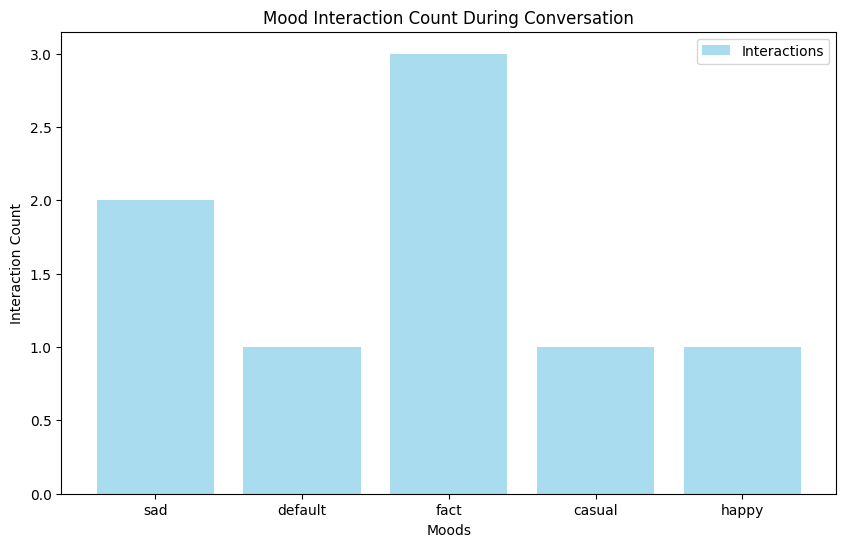

In [18]:
import re
import random
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from googletrans import Translator
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from langdetect import detect

mood_log = defaultdict(list)
translator = Translator()

def chatbot():
    print("Chatbot: Hello! I am your multilingual assistant. Type 'quit' to end the conversation.")
    print("Chatbot: You can chat with me in the following languages:")
    print("""
    Supported Languages:
    - English (en)
    - Hindi (hi)
    - Spanish (es)
    - French (fr)
    - German (de)
    - Chinese Simplified (zh-cn)
    - Arabic (ar)
    - Tamil (ta)
    - Telugu (te)
    - Russian (ru)
    - Japanese (ja)
    - Korean (ko)
    For a complete list, visit: https://cloud.google.com/translate/docs/languages
    """)
    global mood_log
    interaction_count = 0

    while True:
        # Get user input
        user_input = input("You: ")

        if user_input.lower() == 'quit':
            print("Chatbot: Goodbye! Let me summarize your conversation with a mood chart!")
            plot_mood_chart(mood_log)
            break

        detected_language = detect(user_input)
        print(f"Chatbot: Detected language - {detected_language}")

        # Translate the input to English
        translated_input = translator.translate(user_input, src=detected_language, dest='en').text
        print(f"Chatbot: Translated input to English - {translated_input}")

        txt = re.sub('[^a-zA-Z\']', ' ', translated_input)
        txt = txt.lower().strip()

        # Tokenize and encode the input for BERT
        encoded_dict = tokenizer.encode_plus(
            txt,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids = encoded_dict['input_ids'].to(device)
        attention_mask = encoded_dict['attention_mask'].to(device)

        # Predict the intent
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)

        logits = outputs[0]
        probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

        predicted_label_idx = np.argmax(probabilities, axis=1)[0]
        confidence = probabilities[0][predicted_label_idx] * 100
        tag = label_encoder.inverse_transform([predicted_label_idx])[0]

        # Log the mood
        interaction_count += 1
        mood_log[tag].append(confidence)

        if tag in df['tag'].values:
            responses = df[df['tag'] == tag]['responses'].values[0]
            response = random.choice(responses)
        else:
            response = "I'm not sure how to respond to that. Can you rephrase?"

        translated_response = translator.translate(response, src='en', dest=detected_language).text

        print(f"Chatbot: {translated_response}")

def plot_mood_chart(mood_log):
    moods = list(mood_log.keys())
    avg_confidences = [np.mean(mood_log[mood]) for mood in moods]
    interaction_counts = [len(mood_log[mood]) for mood in moods]

    plt.figure(figsize=(10, 6))
    plt.bar(moods, interaction_counts, color='skyblue', alpha=0.7, label="Interactions")
    plt.ylabel("Interaction Count")
    plt.xlabel("Moods")
    plt.title("Mood Interaction Count During Conversation")
    plt.legend()
    plt.show()

# Start the chatbot
chatbot()


Chatbot: Hello! I am your multilingual assistant. Type 'quit' to end the conversation.
Chatbot: You can chat with me in the following languages:

    Supported Languages:
    - English (en)
    - Hindi (hi)
    - Spanish (es)
    - French (fr)
    - German (de)
    - Chinese Simplified (zh-cn)
    - Arabic (ar)
    - Tamil (ta)
    - Telugu (te)
    - Russian (ru)
    - Japanese (ja)
    - Korean (ko)
    For a complete list, visit: https://cloud.google.com/translate/docs/languages
    


Chatbot: Please select a language by entering its code (e.g., 'en' for English):  ta


Chatbot: You have selected 'ta'. Let's start the conversation!


You:  எனக்கு கொஞ்சம் வருத்தமாக இருக்கிறது


Chatbot: Translated input to English - I am a little sad


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: நான் உங்களுக்காக இங்கே இருக்கிறேன்.நீங்கள் ஏன் இந்த வழியில் உணர்கிறீர்கள் என்று சொல்ல முடியுமா?


You:  எனக்கு பள்ளியில் ஒரு மோசமான நாள் இருந்தது


Chatbot: Translated input to English - I had a bad day at school


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: நான் பண்டோரா!


You:  சரி பண்டோரா. இந்த உணர்வை சமாளிக்க எனக்கு உதவ முடியுமா?


Chatbot: Translated input to English - Okay Pandora.Can you help me to deal with this feeling?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: மன ஆரோக்கியம் என்பது நல்வாழ்வின் ஒரு நிலை, அதில் தனிநபர் தனது சொந்த திறன்களை உணர்ந்து, வாழ்க்கையின் இயல்பான அழுத்தங்களைச் சமாளிக்க முடியும், உற்பத்தி ரீதியாகவும் பலனாகவும் செயல்பட முடியும், மேலும் அவரது சமூகத்திற்கு ஒரு பங்களிப்பை வழங்க முடியும்


You:  எனக்கு புரிகிறது


Chatbot: Translated input to English - I understand


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: நான் கேட்கிறேன்.மேலும் சொல்லுங்கள்.


You:  நான் தேர்வில் குறைவான மதிப்பெண்கள் எடுத்துள்ளேன்


Chatbot: Translated input to English - I have scored fewer marks in the exam


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: மன ஆரோக்கியத்தில் நமது உணர்ச்சி, உளவியல் மற்றும் சமூக நல்வாழ்வு அடங்கும்.நாம் எப்படி நினைக்கிறோம், உணர்கிறோம், செயல்படுகிறோம் என்பதை இது பாதிக்கிறது.மன அழுத்தத்தை நாம் எவ்வாறு கையாளுகிறோம், மற்றவர்களுடன் தொடர்புபடுத்துகிறோம், தேர்வுகளைச் செய்வதை இது தீர்மானிக்க உதவுகிறது.


You:  எனக்கு புரிகிறது. நான் என்ன செய்ய வேண்டும்?


Chatbot: Translated input to English - I understand.What should I do?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: மன ஆரோக்கியம் என்பது நல்வாழ்வின் ஒரு நிலை, அதில் தனிநபர் தனது சொந்த திறன்களை உணர்ந்து, வாழ்க்கையின் இயல்பான அழுத்தங்களைச் சமாளிக்க முடியும், உற்பத்தி ரீதியாகவும் பலனாகவும் செயல்பட முடியும், மேலும் அவரது சமூகத்திற்கு ஒரு பங்களிப்பை வழங்க முடியும்


You:  சரி


Chatbot: Translated input to English - Right


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: கடந்த வாரம் நீங்கள் எப்படி உணர்ந்தீர்கள்?


You:  கடந்த வாரம் சிறப்பாக இருந்தது


Chatbot: Translated input to English - Last week was better


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: ஏதேனும் நடந்ததா?


You:  இல்லை


Chatbot: Translated input to English - Not


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: மன ஆரோக்கியம் என்பது நல்வாழ்வின் ஒரு நிலை, அதில் தனிநபர் தனது சொந்த திறன்களை உணர்ந்து, வாழ்க்கையின் இயல்பான அழுத்தங்களைச் சமாளிக்க முடியும், உற்பத்தி ரீதியாகவும் பலனாகவும் செயல்பட முடியும், மேலும் அவரது சமூகத்திற்கு ஒரு பங்களிப்பை வழங்க முடியும்


You:  நான் புரிந்து கொண்டேன். நான் இப்போது நன்றாக உணர்கிறேன்


Chatbot: Translated input to English - I understand.I feel better now


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: ஓ நான் பார்க்கிறேன்.அது பெரியது.


You:  நன்றி


Chatbot: Translated input to English - Thanks


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: ஓ நான் பார்க்கிறேன்.மேலும் சொல்லுங்கள்


You:  quit


Chatbot: Goodbye! Let me summarize your conversation with a mood chart!


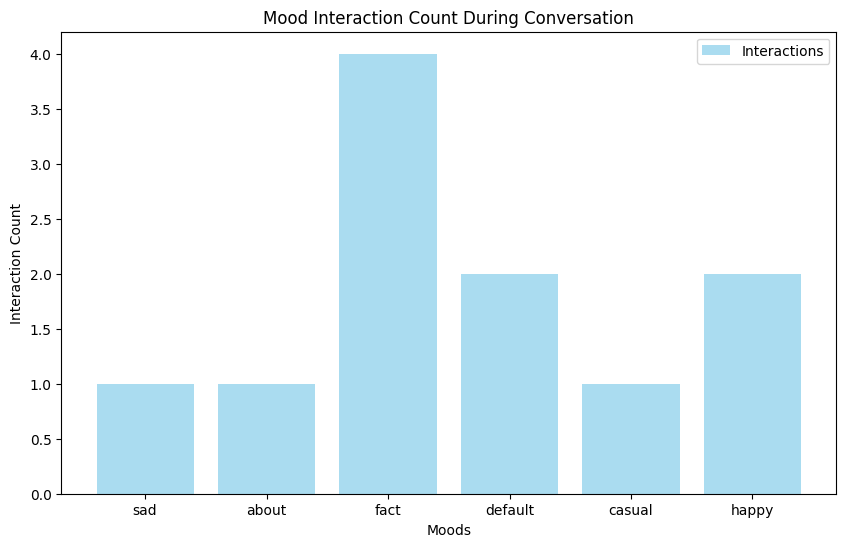

In [19]:
import re
import random
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from googletrans import Translator
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

mood_log = defaultdict(list)
translator = Translator()

def chatbot():
    print("Chatbot: Hello! I am your multilingual assistant. Type 'quit' to end the conversation.")
    print("Chatbot: You can chat with me in the following languages:")
    print("""
    Supported Languages:
    - English (en)
    - Hindi (hi)
    - Spanish (es)
    - French (fr)
    - German (de)
    - Chinese Simplified (zh-cn)
    - Arabic (ar)
    - Tamil (ta)
    - Telugu (te)
    - Russian (ru)
    - Japanese (ja)
    - Korean (ko)
    For a complete list, visit: https://cloud.google.com/translate/docs/languages
    """)

    language_code = input("Chatbot: Please select a language by entering its code (e.g., 'en' for English): ").strip()
    print(f"Chatbot: You have selected '{language_code}'. Let's start the conversation!")

    global mood_log
    interaction_count = 0

    while True:
        user_input = input("You: ")

        if user_input.lower() == 'quit':
            print("Chatbot: Goodbye! Let me summarize your conversation with a mood chart!")
            plot_mood_chart(mood_log)
            break

        # Translate the input to English
        translated_input = translator.translate(user_input, src=language_code, dest='en').text
        print(f"Chatbot: Translated input to English - {translated_input}")

        txt = re.sub('[^a-zA-Z\']', ' ', translated_input)
        txt = txt.lower().strip()

        # Tokenize and encode the input for BERT
        encoded_dict = tokenizer.encode_plus(
            txt,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        input_ids = encoded_dict['input_ids'].to(device)
        attention_mask = encoded_dict['attention_mask'].to(device)

        # Predict the intent
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)

        logits = outputs[0]
        probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()

        predicted_label_idx = np.argmax(probabilities, axis=1)[0]
        confidence = probabilities[0][predicted_label_idx] * 100
        tag = label_encoder.inverse_transform([predicted_label_idx])[0]

        # Log the mood
        interaction_count += 1
        mood_log[tag].append(confidence)

        if tag in df['tag'].values:
            responses = df[df['tag'] == tag]['responses'].values[0]
            response = random.choice(responses)
        else:
            response = "I'm not sure how to respond to that. Can you rephrase?"

        translated_response = translator.translate(response, src='en', dest=language_code).text

        print(f"Chatbot: {translated_response}")

# Function to plot the mood chart
def plot_mood_chart(mood_log):
    moods = list(mood_log.keys())
    avg_confidences = [np.mean(mood_log[mood]) for mood in moods]
    interaction_counts = [len(mood_log[mood]) for mood in moods]

    plt.figure(figsize=(10, 6))
    plt.bar(moods, interaction_counts, color='skyblue', alpha=0.7, label="Interactions")
    plt.ylabel("Interaction Count")
    plt.xlabel("Moods")
    plt.title("Mood Interaction Count During Conversation")
    plt.legend()
    plt.show()

# Start the chatbot
chatbot()
